In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("meta_data/unsort/jsons/summary.csv", header=None)

In [3]:
df.columns = ["Name", "people_num"]

In [4]:
df.head()

,Name,people_num
0,IMG_20201127_161404_899.jpg,35
1,IMG_20201204_133518_552.jpg,27
2,IMG_20201204_133537_962.jpg,31
3,IMG_20201127_160837_428.jpg,17
4,IMG_20201127_161400_713.jpg,37


In [5]:
# import plotly.express as px

# fig = px.histogram(df, x="count")
# fig.show()

In [6]:
df["people_num"].value_counts(bins=11)

(21.455, 25.818]    15
(30.182, 34.545]    11
(25.818, 30.182]    10
(12.727, 17.091]    10
(17.091, 21.455]     8
(8.364, 12.727]      7
(34.545, 38.909]     6
(38.909, 43.273]     4
(47.636, 52.0]       3
(43.273, 47.636]     3
(3.951, 8.364]       3
Name: people_num, dtype: int64

In [7]:
def bin_data(num):
    if num < 5:
        return '0-4'
    elif num < 9:
        return '05-9'
    elif num < 15:
        return '10-14'
    elif num < 20:
        return '15-19'
    elif num < 25:
        return '20-24'
    elif num < 30:
        return '25-29'
    elif num < 35:
        return '30-34'
    elif num < 40:
        return '35-39'
    elif num < 45:
        return '40-44'
    elif num < 50:
        return '45-49'
    elif num < 55:
        return '50-54'
    elif num < 60:
        return '55-59'

In [8]:
bins_name = ['0-4', '05-9','10-14','15-19','20-24','25-29','30-34','35-39','40-44','45-49', '45-49', '50-54' '55-59']

In [9]:
df['bin'] = df['people_num'].apply(bin_data)

In [10]:
df.head()

,Name,people_num,bin
0,IMG_20201127_161404_899.jpg,35,35-39
1,IMG_20201204_133518_552.jpg,27,25-29
2,IMG_20201204_133537_962.jpg,31,30-34
3,IMG_20201127_160837_428.jpg,17,15-19
4,IMG_20201127_161400_713.jpg,37,35-39


In [11]:
# df['bin'].value_counts()

In [12]:
df_value_counts = df['bin'].value_counts()

In [13]:
df_value_counts.head()

20-24    14
30-34    14
15-19    12
10-14    11
25-29    10
Name: bin, dtype: int64

In [14]:
df_value_counts = pd.DataFrame(df_value_counts)

In [15]:
df_value_counts = df_value_counts.reset_index()
df_value_counts.head()

,index,bin
0,20-24,14
1,30-34,14
2,15-19,12
3,10-14,11
4,25-29,10


In [16]:
df_value_counts[df_value_counts['index'] == '5-9']['index'] = '05-9'

In [17]:
df_value_counts.loc

In [18]:
df_value_counts = df_value_counts.sort_values(by='index')

In [45]:
df_value_counts.head(20)

,index,bin
10,0-4,1
9,05-9,2
3,10-14,11
2,15-19,12
0,20-24,14
4,25-29,10
1,30-34,14
5,35-39,6
6,40-44,5
8,45-49,2


In [19]:
sorted_df = df.sort_values(by='people_num')

In [20]:
sorted_df['bin'].value_counts()

20-24    14
30-34    14
15-19    12
10-14    11
25-29    10
35-39     6
40-44     5
50-54     3
45-49     2
05-9      2
0-4       1
Name: bin, dtype: int64

In [21]:
bins=range(0, 60, 5)
print(list(bins))

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55]


In [22]:
bin = []

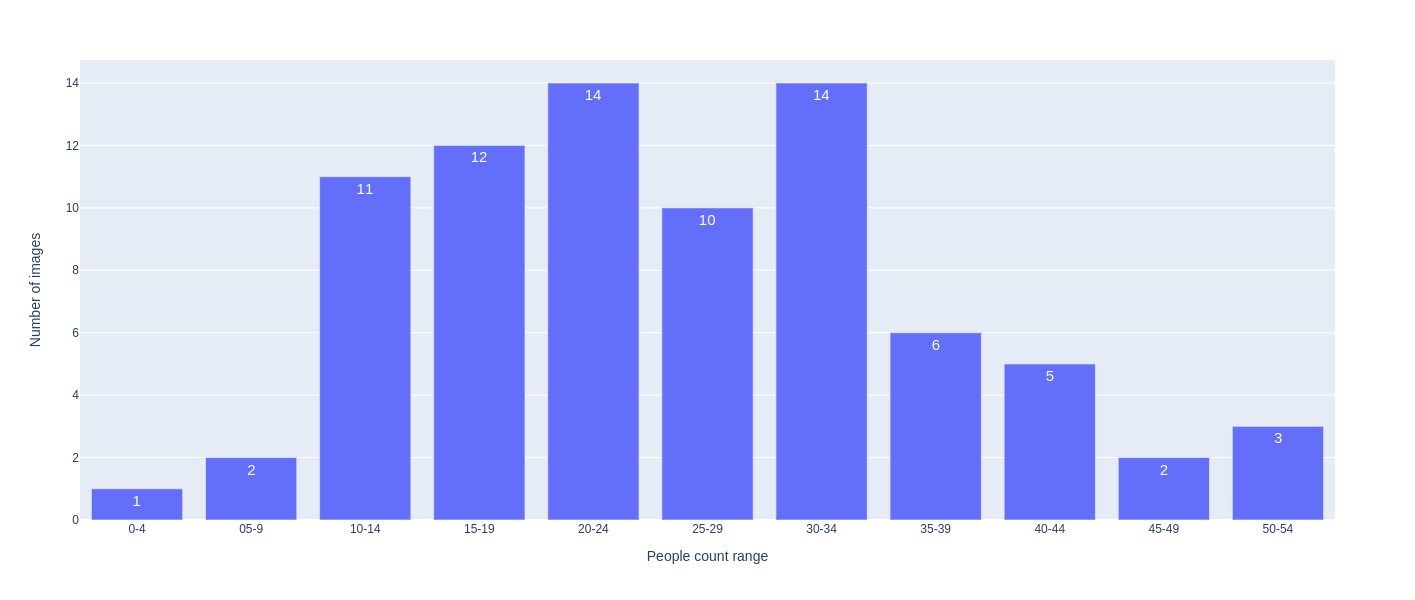

In [46]:
import plotly.express as px
import numpy as np


fig = px.bar(x=df_value_counts['index'], y=df_value_counts['bin'], labels={'x':'People count range', 'y':'Number of images'}, width=900, height=600, text=df_value_counts['bin'])
fig.update_layout(uniformtext_minsize=15, uniformtext_mode='hide')
fig.update_xaxes(type='category')
fig.show()

In [48]:
mean = df['people_num'].mean()
print('mean', mean)
median = df['people_num'].median()
print('median', median)

mean 25.525
median 24.5


In [24]:
df_value_counts['index']

10      0-4
9      05-9
3     10-14
2     15-19
0     20-24
4     25-29
1     30-34
5     35-39
6     40-44
8     45-49
7     50-54
Name: index, dtype: object

In [25]:
df_value_counts['bin']

10     1
9      2
3     11
2     12
0     14
4     10
1     14
5      6
6      5
8      2
7      3
Name: bin, dtype: int64

In [26]:
df

,Name,people_num,bin
0,IMG_20201127_161404_899.jpg,35,35-39
1,IMG_20201204_133518_552.jpg,27,25-29
2,IMG_20201204_133537_962.jpg,31,30-34
3,IMG_20201127_160837_428.jpg,17,15-19
4,IMG_20201127_161400_713.jpg,37,35-39
...,...,...,...
75,IMG_20201204_133530_505.jpg,26,25-29
76,IMG_20201204_133528_100.jpg,19,15-19
77,IMG_20201204_133554_155.jpg,9,10-14
78,IMG_20201204_133520_486.jpg,30,30-34


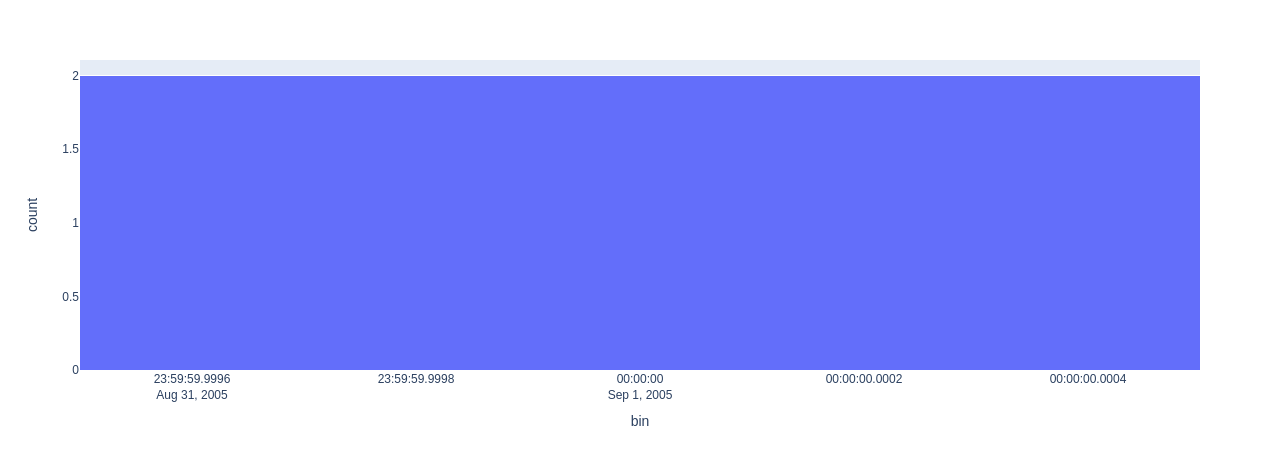

In [27]:
import plotly.express as px
# Here we use a column with categorical data
fig = px.histogram(df, x="bin")
fig.show()

In [28]:
counts, bins = np.histogram(df['people_num'], bins=range(0, 60, 5))

In [29]:
len(counts)

11

In [30]:
len(bins)

12